# Multiple  Linear Regression Algorithm


### Bike Sharing System

#### Group Memeber :Radhika G MLC63

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes using linear model.
2. How well those variables describe the bike demands
3. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [3]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')
import statsmodels.api as sm

from sklearn.metrics import r2_score

In [4]:
#!pip install pandas

### Step1: Reading and understanding data

In [5]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

#Dataset Loading
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Missing Value Check

In [7]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

# Data Cleaning

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
#The column
#instant is just unique number so dropping and 
#dteday is date a we have yr,month field and dropping
#casual and registered column as we are interested in total count 
#We can decide to drop these columns for analysis.
drop_columnlist = ['instant', 'dteday', 'casual','registered']
df = df.drop(drop_columnlist,axis=1)

# Visualising the Data
Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
num_cols=["temp","atemp","hum","windspeed","cnt"]
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]


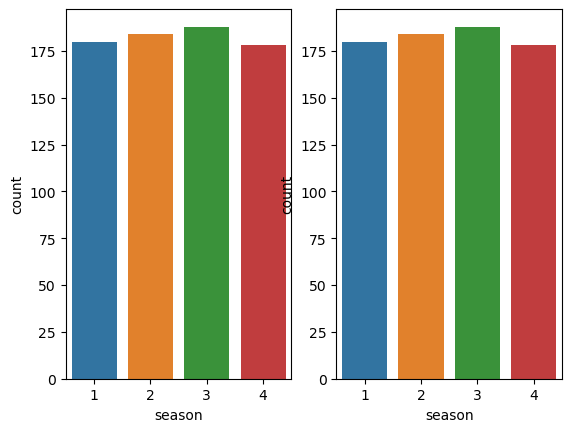

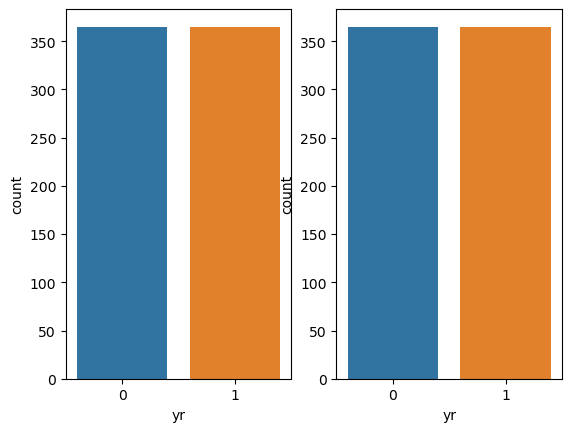

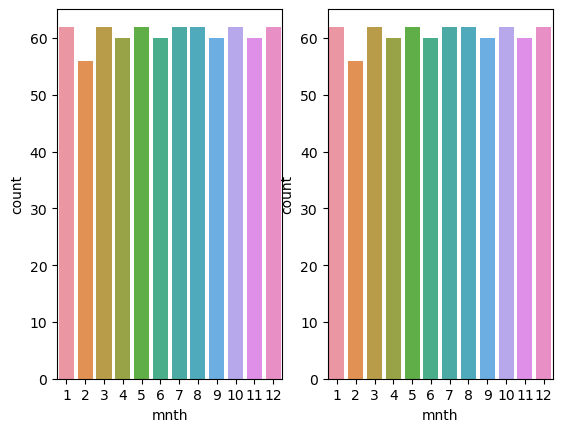

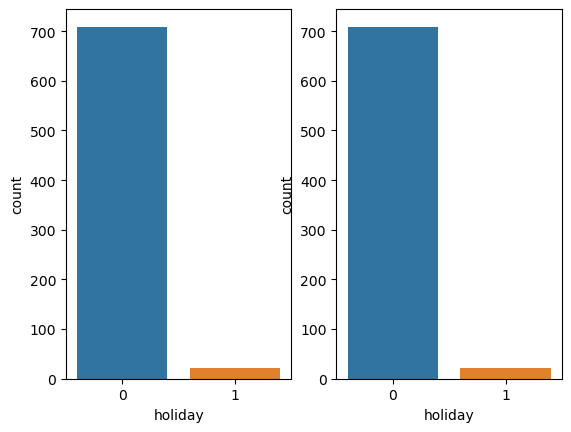

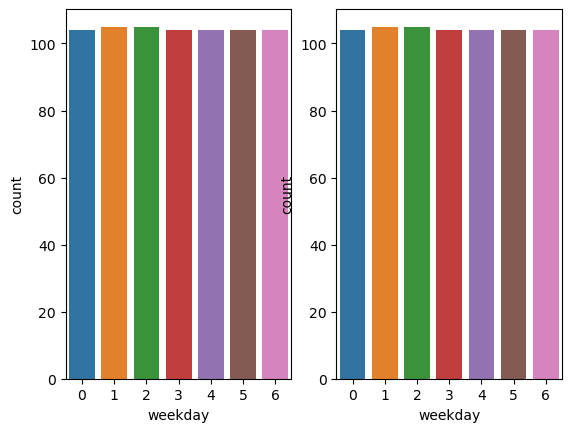

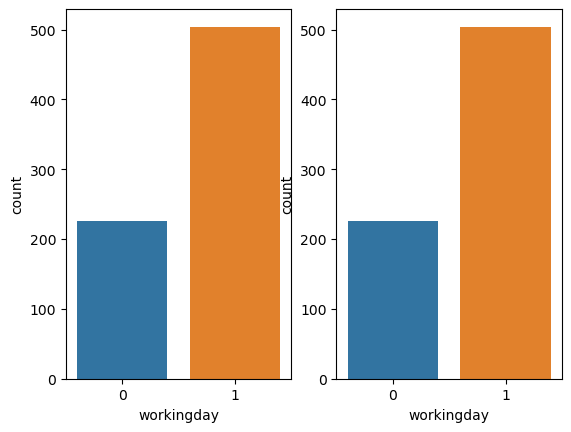

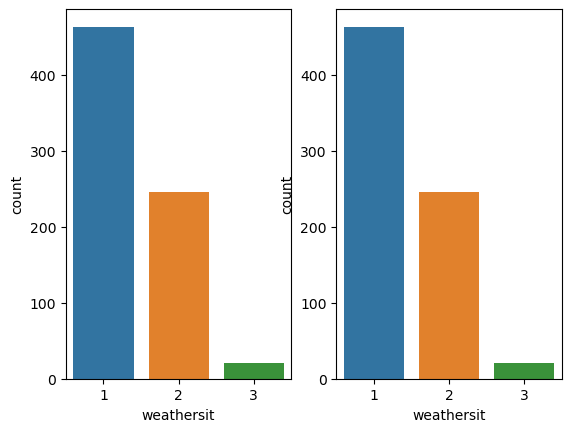

In [11]:
#Univariate Anaylsis
for i in cat_cols :
    fig, ax =plt.subplots(1,2)
    sns.countplot(x=df[i],ax=ax[0])
    sns.countplot(x=df[i],ax=ax[1])
    fig.show()

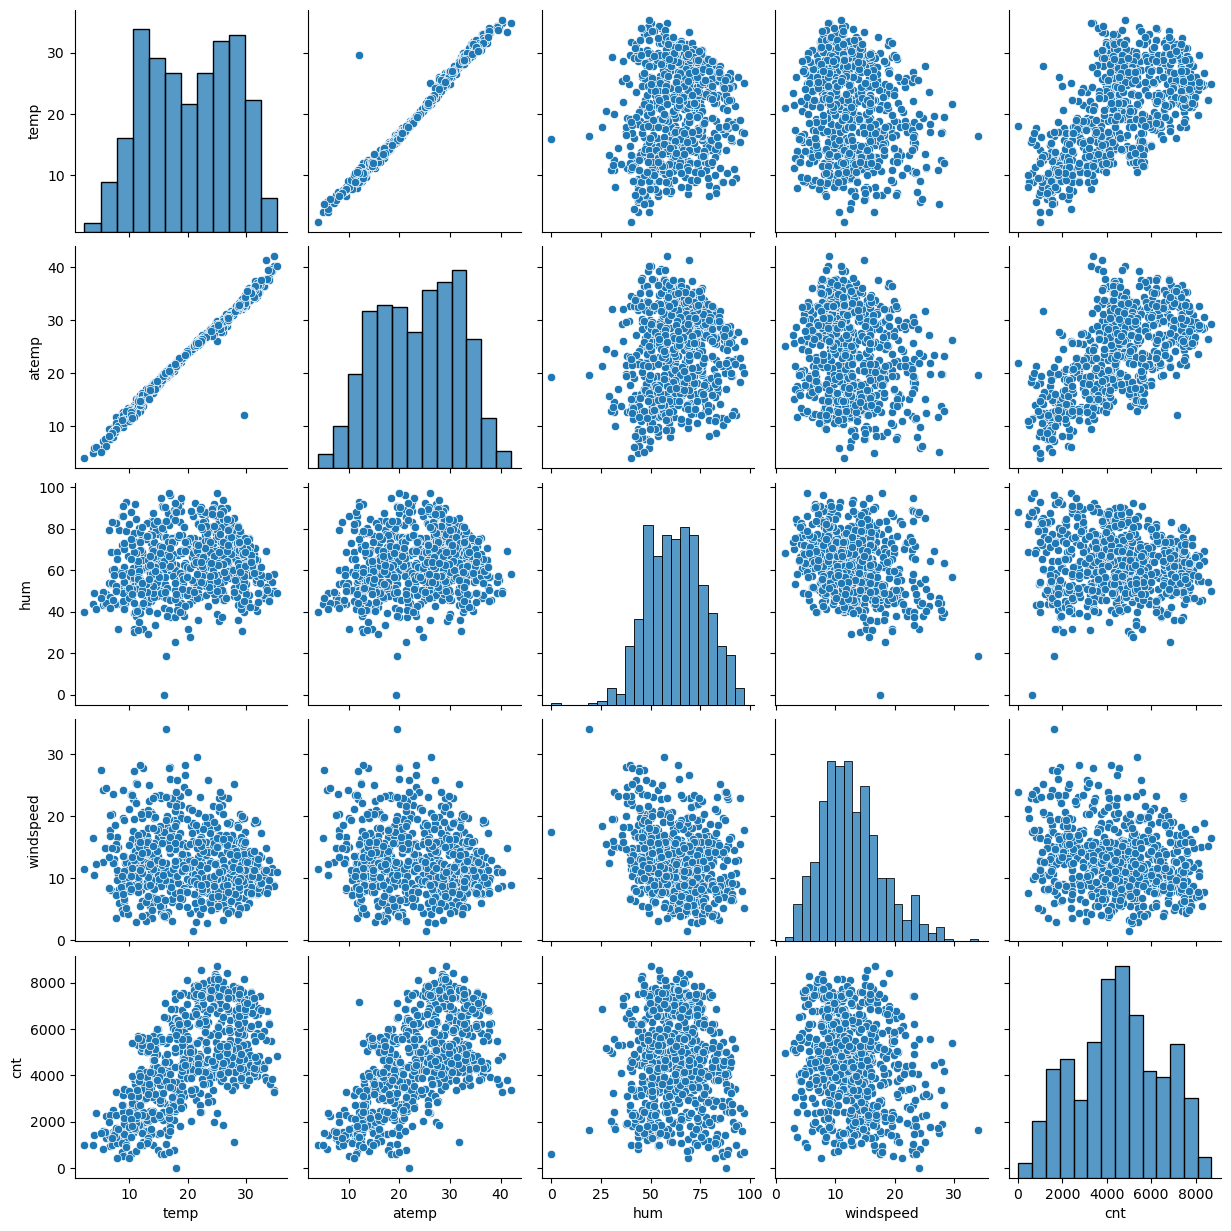

In [12]:
#Visualize numerica columns
sns.pairplot(data = df, vars=["temp","atemp","hum","windspeed","cnt"])
plt.show()

In [91]:
# Observation: As we have noticed temp and atemp have strong correlation with cnt

#Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

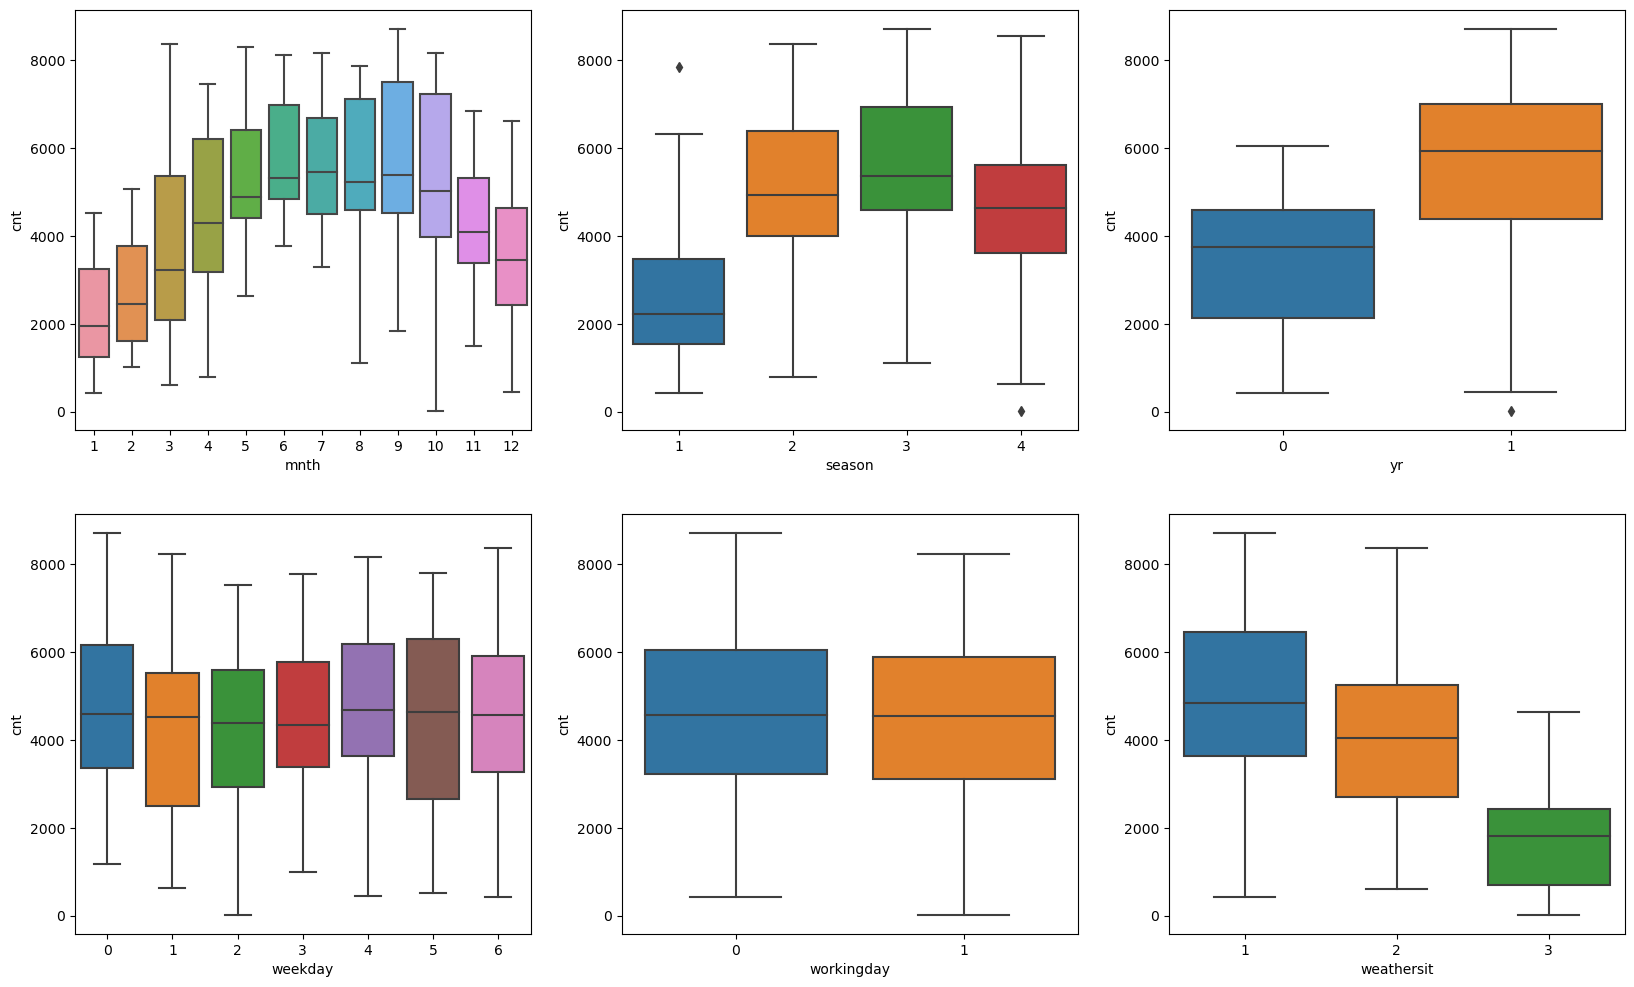

In [92]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

For the variable season, 
we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring .
The year 2019 had a higher count of users as compared to the year 2018
The bike demand is almost constant throughout the week.
The count of total users is in between 4000 to 6000 (~5500) during clear weather
September saw highest no of rentals while January saw least
The count of users is less during the holidays
    

## Pre-processing Steps

### Dummy Variable Creation (One Hot Encoding)

In [93]:
df["season"].unique()
# Preprocessing (Dummy variables) required as it has more than 2 unique values

array([1, 2, 3, 4], dtype=int64)

In [94]:
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [95]:
# Maping seasons
df.season = df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [96]:
# Mapping weathersit
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [97]:
#Mapping Weekday
df.weekday = df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

# Creating Dummy Variables
The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [98]:
dummy = df[['season','mnth','weekday','weathersit']]

In [99]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [100]:
# Adding the dummy variables to the original dataset
df = pd.concat([dummy,df],axis = 1)

In [101]:
df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [102]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


###  Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [103]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [104]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,False,False,True,False,False,False,False,False,False,False,...,False,False,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,False,False,False,False,False,False,False,True,False,False,...,False,False,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,True,False,False,False,False,False,False,False,False,True,...,False,True,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,True,False,False,False,True,False,False,False,False,False,...,False,False,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


 # Rescaling the Features

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()

In [107]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [108]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,False,False,True,False,False,False,False,False,False,False,...,False,False,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,False,False,False,False,False,False,False,True,False,False,...,False,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,False,False,False,False,False,True,...,False,True,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,True,False,False,False,False,False,...,False,False,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [109]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,False,False,False,False,False,False,False,True,False,False,...,False,True,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300
535,False,True,False,False,False,False,False,False,True,False,...,False,False,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421
299,False,False,True,False,False,False,False,False,False,False,...,False,True,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853
221,False,False,False,True,False,False,False,False,False,False,...,False,False,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512
152,False,True,False,False,False,False,False,False,True,False,...,False,False,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148


In [110]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


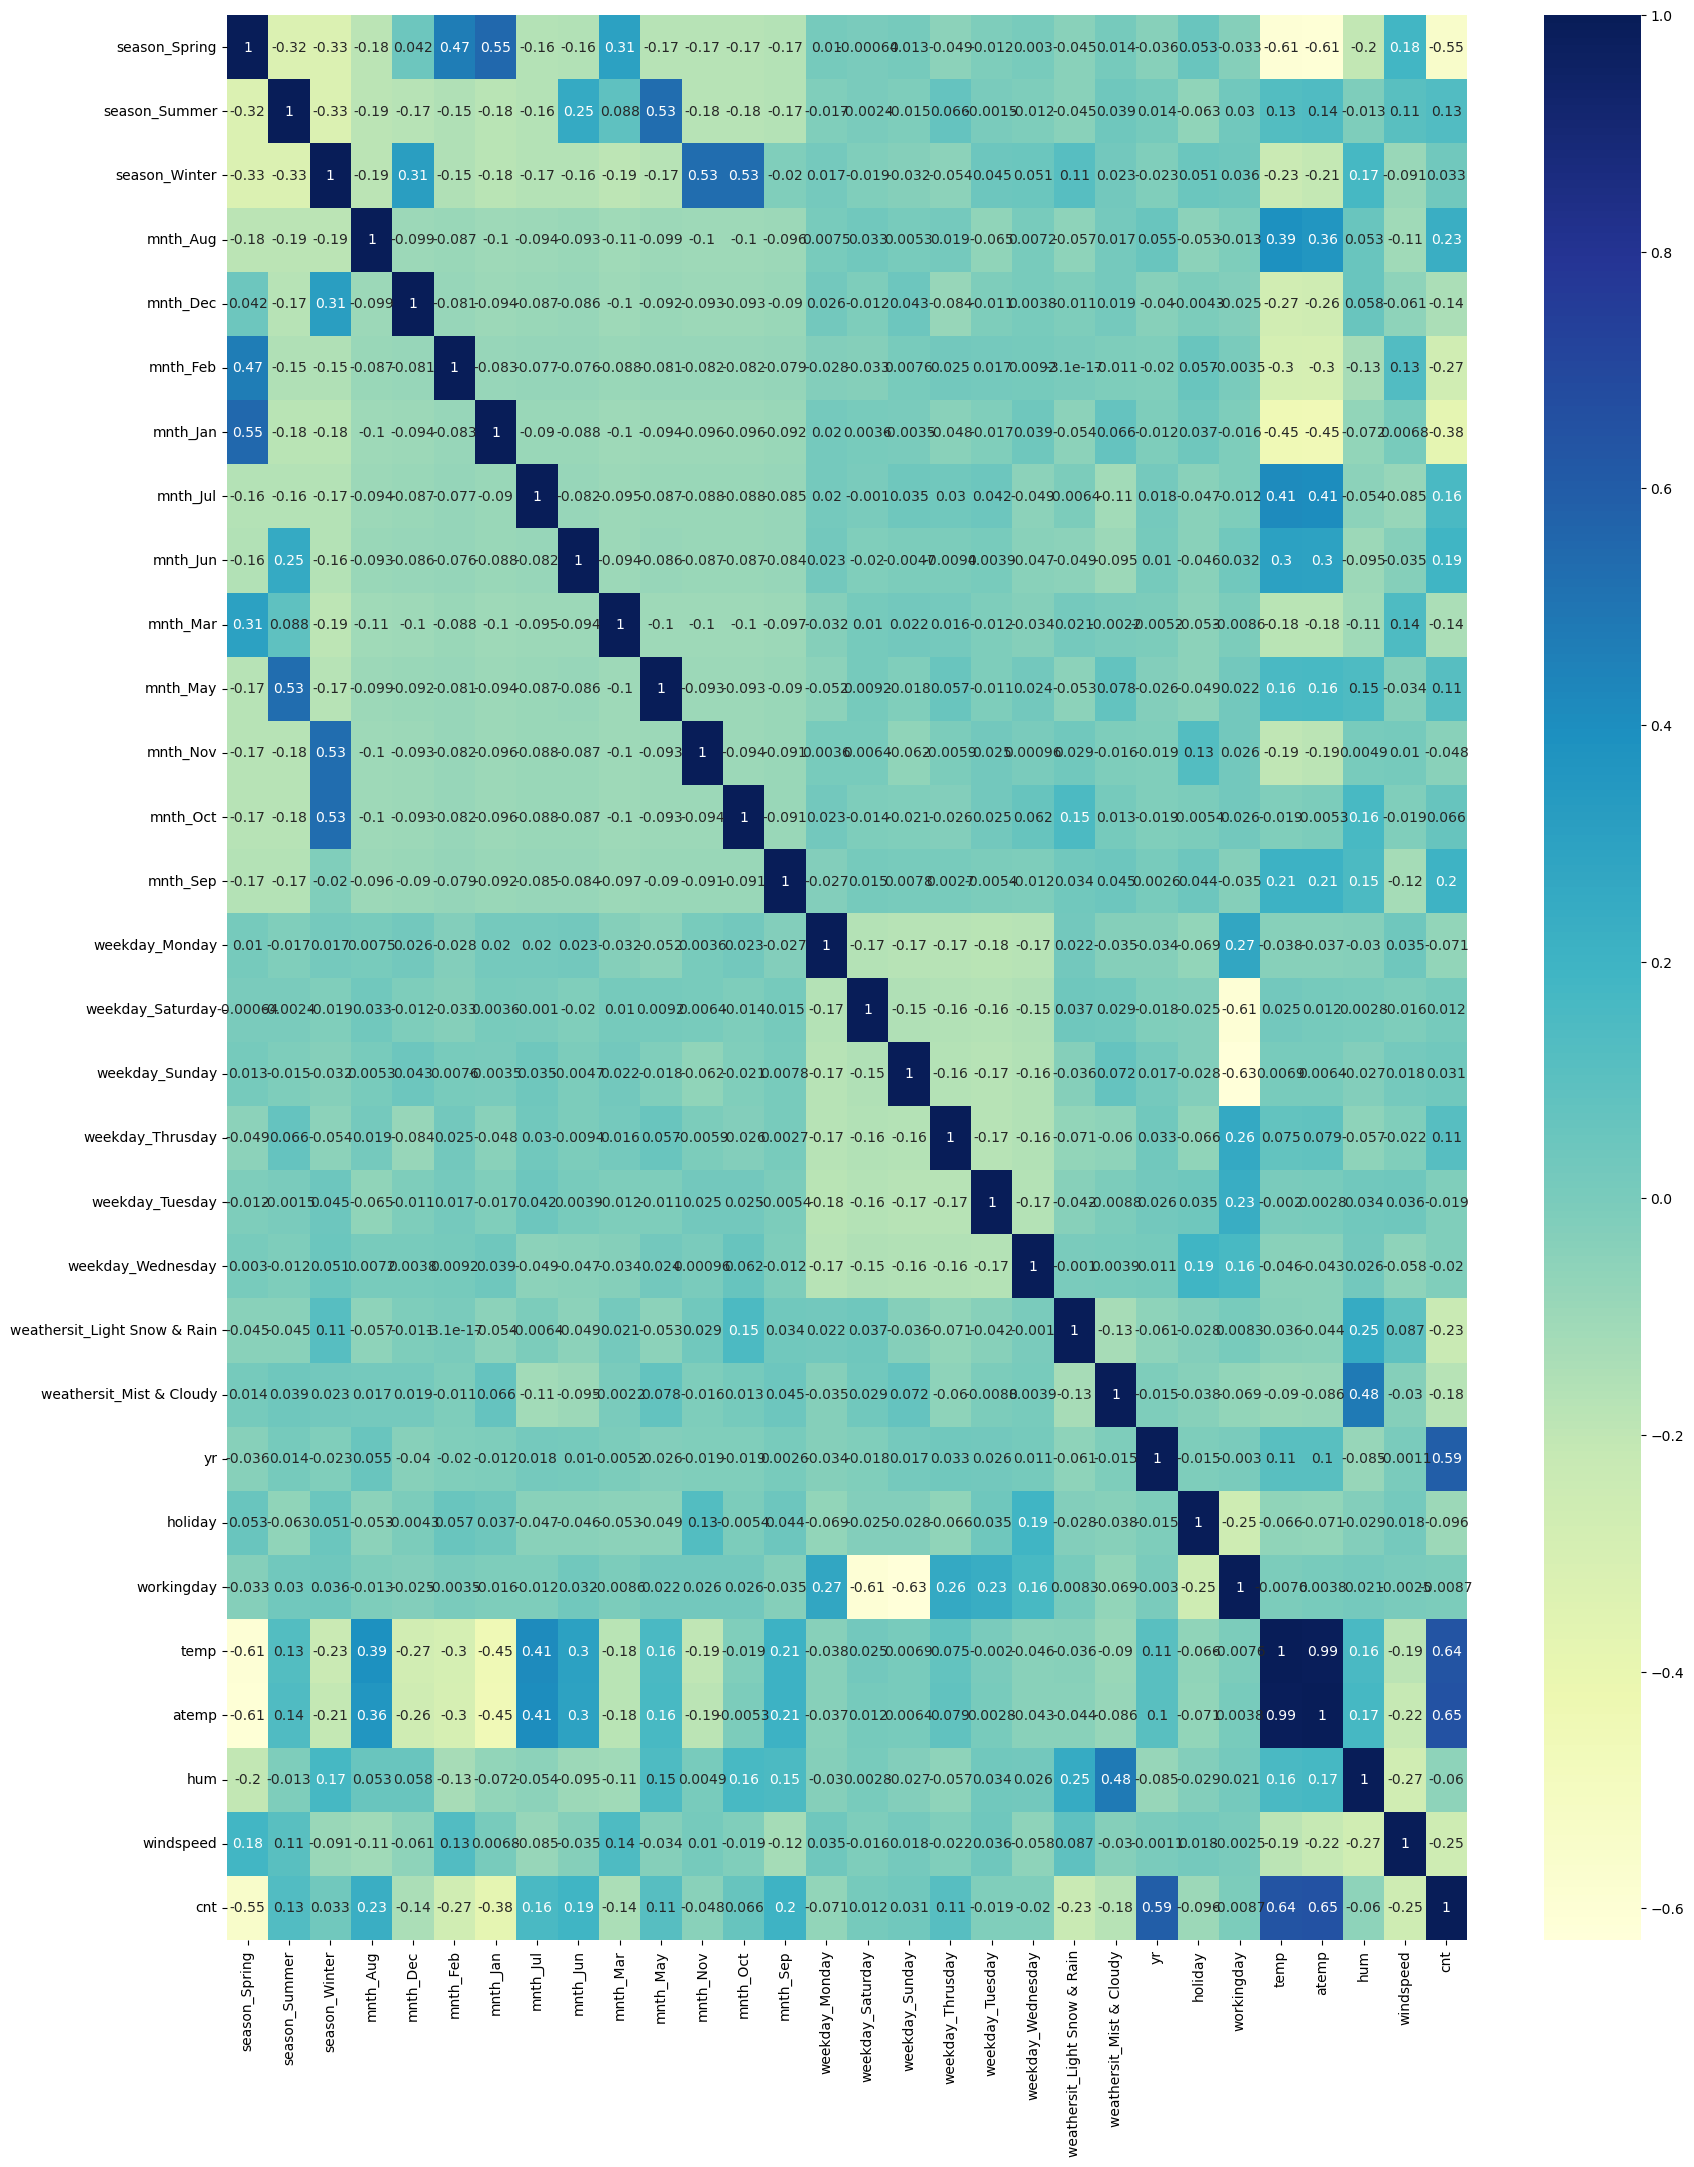

In [111]:
plt.figure(figsize = (20, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation: atemp and temp seems to be correlated to the target variable cnt.


In [112]:
#Dividing into X and Y sets for the model building
X_train = df_train
y_train= df_train.pop("cnt")

In [113]:
y_train.shape

(510,)

# Build a linear model
APPROACH USED :

We will use a mixed approach to build the model.

Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

In [114]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [115]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [116]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [117]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [119]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [120]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [121]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()   # Running the linear model

In [122]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          3.34e-189
Time:                        05:13:33   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [123]:
Conclusion : 
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model.

SyntaxError: invalid syntax (1702723909.py, line 1)

## Checking VIF for multicollinearity
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=11−𝑅𝑖2
 ¶

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
X_train_float =X_train_rfe.astype(float)
vif['VIF'] = [variance_inflation_factor(X_train_float, i) for i in range(X_train_float.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [ ]:
# dropping `const` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
X_train_float =X_train_rfe.astype(float)
vif['VIF'] = [variance_inflation_factor(X_train_float, i) for i in range(X_train_float.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [ ]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
X_train_float =X_train_rfe.astype(float)
vif['VIF'] = [variance_inflation_factor(X_train_float, i) for i in range(X_train_float.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Note:
The VIF value of temp is nearly equal to 5. Hence, we are not dropping this feature.

### Preparing the final model

In [ ]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [ ]:
# Check the summary
print(lm_2.summary())

In [ ]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Step 7: Residual Analysis of the train data

In [ ]:
# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_cnt = lm_2.predict(X_train_lm)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Cross-verifying the above conclusion using a qq-plot as well:

In [ ]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_cnt.astype(float)), fit=True, line='45')
plt.show()

Conclusion:
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

# Step 8: Making Predictions Using the Final Model

  Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

 Applying the scaling on the test sets

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test[num_vars]

#### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#### Predicting using values used by the final model

In [ ]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

In [ ]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test)

#### Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

### <font color = 'red'> Conclusion: 
We can see that the r_squared on the test set is 0.801 and the r-squared on the trained set 0.840 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Conclusion:
We can colude that the final model fit and has descent predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [ ]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2466 + 0.437 \times  temp + 0.2342  \times  yr + 0.8865 \times season Winter + 0.0682 \times mnth Sept + 0.0033 \times season Summer - 0.0418 \times mnth Nov - 0.04452 \times mnth Dec - 0.0050 \times mnth Jan - 0.0503 \times mnth Jul - 0.0716 \times season Spring - 0.0814 \times weathersit Mist Cloudy - 0.0919 \times holiday - 0.1585 \times windspeed - 0.2928 \times weathersit Light Snow Rain $

#### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
#### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.437655)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.292892)
 - year (0.234287)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

## <font color='red'> Final Recommendations for the Company: </font>

- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand